## Modules

In [1]:
import os
from tqdm import tqdm

import numpy as np
from scipy.signal import find_peaks, correlate, butter, sosfilt, freqs
from scipy.ndimage import gaussian_filter, median_filter
from scipy.stats import sem
from signal_analysis import SignalAnalysis

import seaborn as sns
import seaborn_image as isns
import cmcrameri.cm as cmc
from matplotlib import pyplot as plt


cmap = 'cmc.batlow'
# sns.set_palette(cmap)

## Open data

In [6]:
# pathBase = r"Z:\gGermain\2024_09_12\4"
pathBase = r"C:\Users\gabri\Desktop\testAnalyse\2024_09_12"
N = 2
green = np.loadtxt(pathBase + "\\csv\\530_{}.csv".format(N), skiprows=1, delimiter=',')[:,1]
violet = np.loadtxt(pathBase + "\\csv\\405_{}.csv".format(N), skiprows=1, delimiter=',')[:,1]
blue = np.loadtxt(pathBase + "\\csv\\470_{}.csv".format(N), skiprows=1, delimiter=',')[:,1]

green_t = np.load(pathBase + "\\530ts.npy")
violet_t = np.load(pathBase + "\\405ts.npy")
blue_t = np.load(pathBase + "\\470ts.npy")

## AP time series

In [3]:
FPS = 50
AP_idx = []
nChannels=5
AP_begin = 5
percycle=15
FPSc = FPS/nChannels
framespcycles = int(FPSc*percycle)
ncycles = int(len(violet_t)//framespcycles)
AP_times = np.array(list(range(ncycles)))*15+5

for ti in AP_times:
    AP_idx.append(np.argmin(np.absolute(violet_t-ti)))

# Dirac où AP dans times series
AP_series = np.zeros(len(violet_t))
AP_series[AP_idx] = 1

## Plot rapide

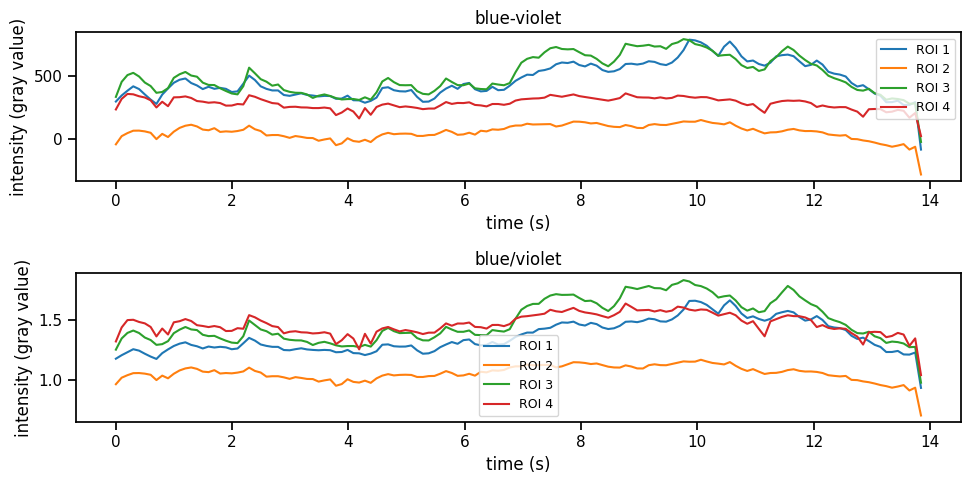

In [10]:

sns.set_context("notebook")
pathBase = r"C:\Users\gabri\Desktop\testAnalyse\2024_09_12"
figure = plt.figure(figsize=(10,5))

for i in range (1, 5):
    
    violet = np.loadtxt(pathBase + "\\csv\\405_{}.csv".format(i), skiprows=1, delimiter=',')[:,1]
    blue = np.loadtxt(pathBase + "\\csv\\470_{}.csv".format(i), skiprows=1, delimiter=',')[:,1]
    violet_t = np.load(pathBase + "\\405ts.npy")
    blue_t = np.load(pathBase + "\\470ts.npy")

    ax1 = plt.subplot(2, 1, 1)
    ax1.set_title("blue-violet")
    plt.plot(blue_t, (blue-violet), label="ROI {}".format(i))
    plt.legend(fontsize=9)
    plt.xlabel("time (s)")
    plt.ylabel("intensity (gray value)")

    ax2 = plt.subplot(2, 1, 2)
    ax2.set_title("blue/violet")
    plt.plot(blue_t, blue/violet, label="ROI {}".format(i))
    plt.legend(fontsize=9)
    plt.xlabel("time (s)")
    plt.ylabel("intensity (gray value)")

plt.tight_layout()


    # plt.plot(blue_t, blue/np.mean(blue), 'b-')
    # plt.plot(violet_t, violet/np.mean(violet)-0.1, color='purple')

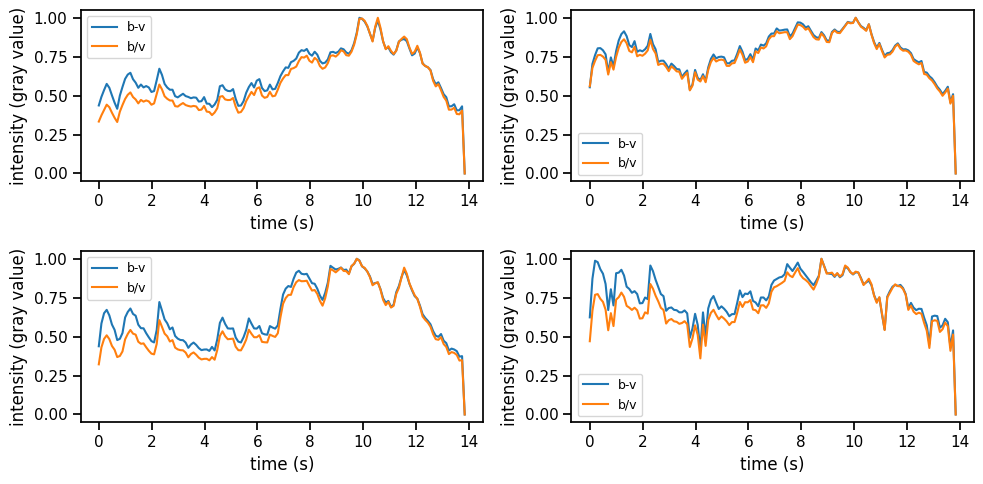

In [11]:
sns.set_context("notebook")
pathBase = r"C:\Users\gabri\Desktop\testAnalyse\2024_09_12"
figure = plt.figure(figsize=(10,5))

for i in range (1, 5):
    
    violet = np.loadtxt(pathBase + "\\csv\\405_{}.csv".format(i), skiprows=1, delimiter=',')[:,1]
    blue = np.loadtxt(pathBase + "\\csv\\470_{}.csv".format(i), skiprows=1, delimiter=',')[:,1]
    violet_t = np.load(pathBase + "\\405ts.npy")
    blue_t = np.load(pathBase + "\\470ts.npy")

    ax1 = plt.subplot(2, 2, i)
    # ax1.set_title("blue-violet")
    b_v = blue-violet
    plt.plot(blue_t, (b_v-np.min(b_v))/(np.max(b_v)-np.min(b_v)), label="b-v".format(i))
    b__v = blue/violet
    plt.plot(blue_t, (b__v-np.min(b__v))/(np.max(b__v)-np.min(b__v)), label="b/v".format(i))
    plt.legend(fontsize=9)
    plt.xlabel("time (s)")
    plt.ylabel("intensity (gray value)")

    # ax2 = plt.subplot(2, 2, 2)
    # ax2.set_title("blue/violet")
    # plt.plot(blue_t, blue/violet, label="ROI {}".format(i))
    # plt.legend(fontsize=9)
    # plt.xlabel("time (s)")
    # plt.ylabel("intensity (gray value)")

plt.tight_layout()

C:\Users\gabri\AppData\Local\Temp\ipykernel_12012\3695868159.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=9)


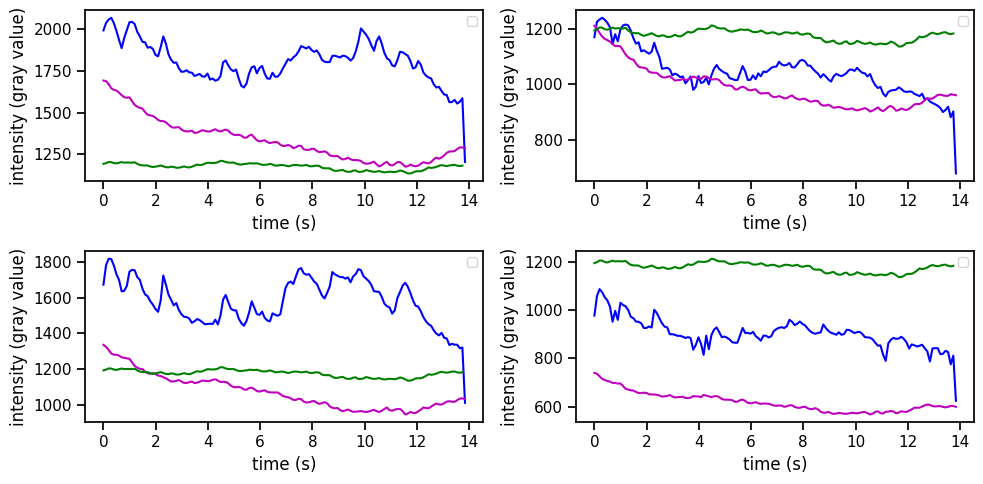

In [13]:
sns.set_context("notebook")
pathBase = r"C:\Users\gabri\Desktop\testAnalyse\2024_09_12"
figure = plt.figure(figsize=(10,5))

for i in range (1, 5):
    
    violet = np.loadtxt(pathBase + "\\csv\\405_{}.csv".format(i), skiprows=1, delimiter=',')[:,1]
    blue = np.loadtxt(pathBase + "\\csv\\470_{}.csv".format(i), skiprows=1, delimiter=',')[:,1]
    violet_t = np.load(pathBase + "\\405ts.npy")
    blue_t = np.load(pathBase + "\\470ts.npy")

    ax1 = plt.subplot(2, 2, i)
    # ax1.set_title("blue-violet")
    # b_v = blue-violet
    # plt.plot(blue_t, (b_v-np.min(b_v))/(np.max(b_v)-np.min(b_v)), label="b-v".format(i))
    # b__v = blue/violet
    # plt.plot(blue_t, (b__v-np.min(b__v))/(np.max(b__v)-np.min(b__v)), label="b/v".format(i))
    plt.plot(blue_t, blue, 'b-')
    plt.plot(violet_t, violet, 'm-')
    plt.plot(green_t, green, 'g-')
    plt.legend(fontsize=9)
    plt.xlabel("time (s)")
    plt.ylabel("intensity (gray value)")

    # ax2 = plt.subplot(2, 2, 2)
    # ax2.set_title("blue/violet")
    # plt.plot(blue_t, blue/violet, label="ROI {}".format(i))
    # plt.legend(fontsize=9)
    # plt.xlabel("time (s)")
    # plt.ylabel("intensity (gray value)")

plt.tight_layout()

In [13]:
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np
import pandas as pd
import seaborn as sns


root = r'C:\Users\gabri\Documents\Université\Maitrise\Projet\Poster\fpbase_spectra.csv'

data = pd.read_csv(root, sep=',', header=0, engine='python')

wl = np.array(data['wavelength'])
ex = np.array(data['GCaMP6f (In presence of Ca2+) ex'])
em = np.array(data['GCaMP6f (In presence of Ca2+) em'])

wl_fill = wl[105-10:]
em_fill = em[105-10:]

wl_405 = wl[0:10]
ex_405 = ex[0:10]

wl_470 = wl[64:76]
ex_470 = ex[64:76]

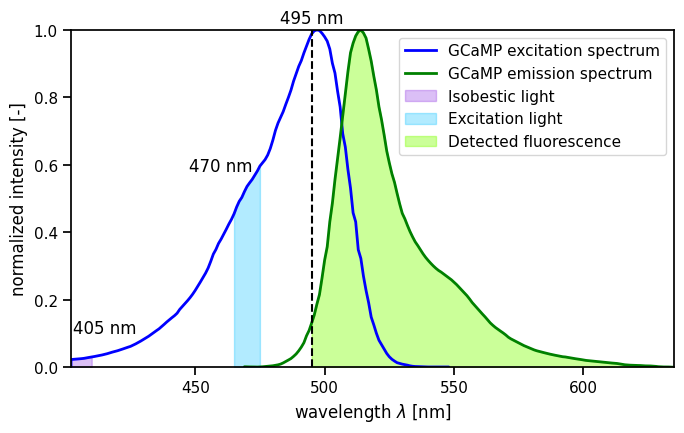

In [11]:
sns.set_context('notebook')

plt.figure(figsize=(7,4.5))

plt.plot(wl, ex, color='blue', linewidth=2, label='GCaMP excitation spectrum')
plt.plot(wl, em, color='green', linewidth=2, label='GCaMP emission spectrum')

plt.fill_between(wl_405, np.zeros(len(wl_405)), ex_405, color='blueviolet', alpha=0.3, label='Isobestic light')
plt.fill_between(wl_470, np.zeros(len(wl_470)), ex_470, color='deepskyblue', alpha=0.3, label='Excitation light')
plt.fill_between(wl_fill, np.zeros(len(wl_fill)), em_fill, color='chartreuse', alpha=0.4, label='Detected fluorescence')

plt.vlines(495, 0, 1, colors='k', linestyles='dashed', linewidth=1.5)
plt.text(415, 0.1, '405 nm', ha='center', size=12)
plt.text(460, 0.58, '470 nm', ha='center', size=12)
plt.text(495, 1.02, '495 nm', ha='center', size=12)

plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel('normalized intensity [-]')
plt.legend()
plt.ylim(0, 1)
plt.xlim(402, 635)

plt.tight_layout()
# plt.savefig('GCaMP4_gros.svg', dpi=600)
plt.show()

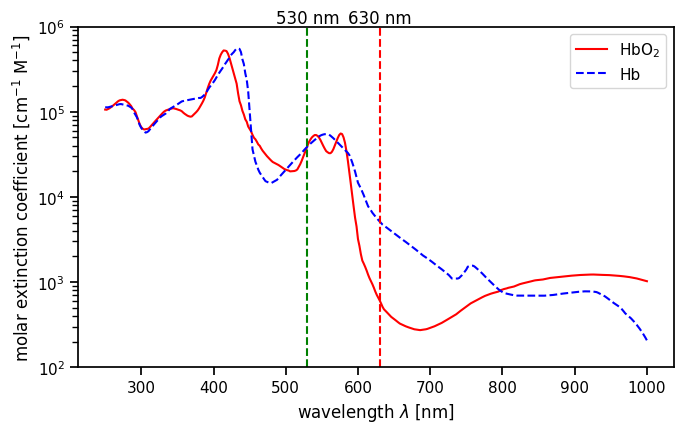

In [19]:
# from matplotlib import pyplot as plt
# import numpy as np

data = np.loadtxt(r'C:\Users\gabri\Documents\Université\Maitrise\Projet\Poster\scott_prahl_HbO_Hb.txt', skiprows=2)

wl = data[:, 0]
HbO = data[:, 1] 
Hb = data[:,2]


sns.set_context('notebook')
plt.figure(figsize=(7,4.5))

plt.plot(wl, HbO, 'r-', label=r'HbO$_2$')
plt.plot(wl, Hb, 'b--', label=r'Hb')

plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'molar extinction coefficient [cm$^{-1}$ M$^{-1}$]')
plt.yscale('log')
plt.vlines(530, 1e2, 1e6, colors='g', linestyles='dashed')
plt.vlines(630, 1e2, 1e6, colors='r', linestyles='dashed')
plt.legend()
plt.ylim(1e2, 1e6)
plt.text(530, 1.1e6, '530 nm', ha='center', size=12)
plt.text(630, 1.1e6, '630 nm', ha='center', size=12)
plt.tight_layout()
# plt.savefig('scott_prahl_gros.svg', dpi=600)
plt.show()